In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "data/"

In [2]:
cv_results_sample_negative = pd.read_csv(data_dir + "cv_results_mb_gen.csv")
cv_results_sample_negative.sort_values("mean_test_AU_PRC", inplace=True, ascending=False)

In [4]:
sliced_results = cv_results_sample_negative[["mean_test_AU_PRC",
                             "std_test_AU_PRC",
                             "mean_train_AU_PRC",
                             "std_train_AU_PRC",
                             "mean_test_AVG_PREC",
                             "std_test_AVG_PREC",
                             "mean_train_AVG_PREC",
                             "std_train_AVG_PREC",                             
                             "mean_test_AU_ROC",
                             "std_test_AU_ROC",
                             "mean_train_AU_ROC",
                             "std_train_AU_ROC",
                             "params",
                             "mean_fit_time",  
                            ]]
series = sliced_results["params"].apply(lambda x: eval(x)).apply(pd.Series)
sliced_results = pd.concat([series, sliced_results], axis=1)
sliced_results = sliced_results.drop("params", axis=1)
sliced_results = sliced_results.rename(lambda x: x.replace("_", ""), axis=1)
sliced_results = sliced_results.round(decimals=3)
sliced_results = sliced_results.applymap(lambda x: x.replace("_", " ") if isinstance(x, str) else x)
sliced_results.head()

,negativeperc,npratio,positivesampleperc,meantestAUPRC,stdtestAUPRC,meantrainAUPRC,stdtrainAUPRC,meantestAVGPREC,stdtestAVGPREC,meantrainAVGPREC,stdtrainAVGPREC,meantestAUROC,stdtestAUROC,meantrainAUROC,stdtrainAUROC,meanfittime
3,0.25,0.5,1.00,0.630,0.077,0.037,0.003,0.637,0.071,0.038,0.003,0.982,0.002,0.989,0.001,64.225
33,0.50,0.5,1.00,0.622,0.090,0.056,0.015,0.624,0.090,0.056,0.015,0.979,0.002,0.990,0.001,150.025
21,0.25,3.0,1.00,0.599,0.103,0.039,0.003,0.616,0.089,0.040,0.004,0.981,0.005,0.983,0.002,27.933
7,0.25,1.0,0.50,0.549,0.160,0.040,0.003,0.555,0.153,0.041,0.003,0.978,0.004,0.990,0.001,51.479
42,0.50,1.5,0.25,0.544,0.072,0.062,0.008,0.552,0.066,0.063,0.008,0.973,0.008,0.990,0.001,136.051


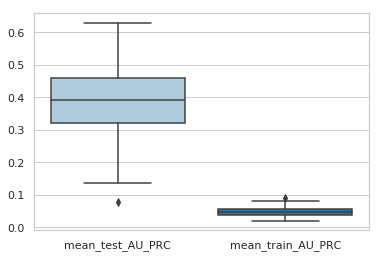

In [6]:
sns.set(style="whitegrid")
sns.boxplot(orient="v",data=cv_results_sample_negative[["mean_test_AU_PRC","mean_train_AU_PRC"]],palette="Paired")

In [ ]:
sliced_results.to_csv(data_dir + "cv_results_for_report.csv", index=False)

# Comparing various runs of the same experiment

In [14]:
relevant_columns = ["param_np_ratio", "param_negative_perc", "param_positive_sample_perc", "std_test_AU_PRC", "mean_test_AU_PRC"]
cv_results1 = pd.read_csv(data_dir + "cv_results_mb_gen.csv")[relevant_columns]
cv_results2 = pd.read_csv(data_dir + "cv_results_mb_gen_v2.csv")[relevant_columns]
cv_results3 = pd.read_csv(data_dir + "cv_results_mb_gen_v3.csv")[relevant_columns]

In [15]:
mean_test_AU_PRC_1 = cv_results1["mean_test_AU_PRC"]
mean_test_AU_PRC_2 = cv_results2["mean_test_AU_PRC"]
mean_test_AU_PRC_3 = cv_results3["mean_test_AU_PRC"]
compared_results = cv_results1
compared_results = compared_results.assign(**{"run2":mean_test_AU_PRC_2, "run3":mean_test_AU_PRC_3})

In [16]:
compared_results = compared_results.rename(index=str, columns={"mean_test_AU_PRC":"run1"})

In [ ]:
compared_results.to_csv(data_dir + "cv_results_compared_long.csv")

In [17]:
compared_results[(compared_results["run1"] - compared_results["run2"]).abs() > 0.15].round(3)

,param_np_ratio,param_negative_perc,param_positive_sample_perc,std_test_AU_PRC,run1,run2,run3
24,5.0,0.25,0.25,0.140,0.242,0.410,0.306
36,1.0,0.50,0.25,0.146,0.430,0.212,0.265
41,1.0,0.50,1.50,0.127,0.162,0.392,0.407
53,3.0,0.50,1.50,0.071,0.324,0.525,0.419
63,0.5,1.00,1.00,0.073,0.534,0.338,0.222
65,0.5,1.00,1.50,0.187,0.263,0.439,0.367
67,1.0,1.00,0.50,0.051,0.078,0.391,0.186
72,1.5,1.00,0.25,0.176,0.409,0.224,0.289
73,1.5,1.00,0.50,0.078,0.463,0.259,0.391
83,3.0,1.00,1.50,0.106,0.367,0.530,0.457


In [18]:
compared_results[(compared_results["run1"] - compared_results["run3"]).abs() > 0.15].round(3)

,param_np_ratio,param_negative_perc,param_positive_sample_perc,std_test_AU_PRC,run1,run2,run3
16,1.5,0.25,1.25,0.150,0.387,0.320,0.177
34,0.5,0.50,1.25,0.196,0.418,0.551,0.586
36,1.0,0.50,0.25,0.146,0.430,0.212,0.265
38,1.0,0.50,0.75,0.216,0.228,0.250,0.431
41,1.0,0.50,1.50,0.127,0.162,0.392,0.407
43,1.5,0.50,0.50,0.195,0.469,0.343,0.226
47,1.5,0.50,1.50,0.112,0.404,0.379,0.585
63,0.5,1.00,1.00,0.073,0.534,0.338,0.222
64,0.5,1.00,1.25,0.177,0.280,0.365,0.463
68,1.0,1.00,0.75,0.199,0.436,0.294,0.272
